In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from pylab import rcParams
from numpy import diff
from scipy import interpolate
import scipy.stats as stats

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec

In [2]:
df_iron = pd.read_csv('../Dissertation_projects/Data/IRON/Iron.csv', sep=',', index_col=0)

#make all the spots labeled NA a nan value
df_iron = df_iron.replace('NA', np.nan)
df_iron = df_iron.replace('NA ', np.nan)

#make all BDL a 0 
df_iron.loc[df_iron['FeT_uM'] == 'BLD', 'FeT_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] == 'BLD', 'Fe2_uM'] = 0

# convert columns to numeric data type
df_iron['FeT_uM'] = pd.to_numeric(df_iron['FeT_uM'], errors='coerce')
df_iron['Fe2_uM'] = pd.to_numeric(df_iron['Fe2_uM'], errors='coerce')

df_iron['FeT_uM'] = df_iron['FeT_uM'].where(pd.notna(df_iron['FeT_uM']), other=np.nan)
df_iron['Fe2_uM'] = df_iron['Fe2_uM'].where(pd.notna(df_iron['Fe2_uM']), other=np.nan)

#make all negative a 0 
df_iron.loc[df_iron['FeT_uM'] < 0, 'FeT_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] < 0, 'Fe2_uM'] = 0

#calculate Fe +3 
df_iron['Fe3_uM'] = df_iron['FeT_uM'] - df_iron['Fe2_uM']
df_iron.loc[df_iron['Fe3_uM'] < 0, 'Fe3_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] > df_iron['FeT_uM'], 'Fe3_uM'] = 0
df_iron['Fe3_uM'] = pd.to_numeric(df_iron['Fe3_uM'], errors='coerce')
df_iron['Fe3_uM'] = df_iron['Fe3_uM'].where(pd.notna(df_iron['Fe3_uM']), other=np.nan)

#time feild 
df_iron['Fe2_Time'] = pd.to_numeric(df_iron['Fe2_Time'], errors='coerce')
df_iron['Fe2_Time'] = df_iron['Fe2_Time'].where(pd.notna(df_iron['Fe2_Time']), other=np.nan)

#time feild 
df_iron['FeT_Time'] = pd.to_numeric(df_iron['FeT_Time'], errors='coerce')
df_iron['FeT_Time'] = df_iron['FeT_Time'].where(pd.notna(df_iron['FeT_Time']), other=np.nan)

# convert columns to numeric data type
df_iron['FeT_Depth'] = pd.to_numeric(df_iron['Fe2_Depth'], errors='coerce')
df_iron['Fe2_Depth'] = pd.to_numeric(df_iron['Fe2_Depth'], errors='coerce')

df_iron['code'] = df_iron['Location'] + '_' + df_iron['Campaign']

In [3]:
df_doc = pd.read_csv('../Dissertation_projects/Data/TOC/TOC_GOM.csv', sep=',', index_col=0)

#make all BDL a 0 
df_doc.loc[df_doc['NPOC_uM'] == 'BLD', 'NPOC_uM'] = 0
df_doc.loc[df_doc['TN_uM'] == 'BLD', 'TN_uM'] = 0

df_doc.loc[df_doc['NPOC_uM'] < 0, 'NPOC_uM'] = 0
df_doc.loc[df_doc['TN_uM'] < 0, 'TN_uM'] = 0

#fix date time 
df_doc['date_time'] = pd.to_datetime(df_doc['Date'])
df_doc['Date'] = df_doc['date_time'].dt.date

df_doc['NPOC_uM'] = pd.to_numeric(df_doc['NPOC_uM'], errors='coerce')
df_doc['NPOC_uM'] = df_doc['NPOC_uM'].where(pd.notna(df_doc['NPOC_uM']), other=np.nan)

df_doc['TN_uM'] = pd.to_numeric(df_doc['TN_uM'], errors='coerce')
df_doc['TN_uM'] = df_doc['TN_uM'].where(pd.notna(df_doc['TN_uM']), other=np.nan)

df_doc['Time'] = pd.to_numeric(df_doc['Time'], errors='coerce')
df_doc['Time'] = df_doc['Time'].where(pd.notna(df_doc['Time']), other=np.nan)

df_doc['code'] = df_doc['Location'] + '_' + df_doc['Campaign']

In [4]:
df_meta = pd.read_csv('../Dissertation_projects/Data/meta_data.csv', sep=',', index_col=0)

#fix date time 
df_meta['date_time'] = pd.to_datetime(df_meta['Date'])
df_meta['Date'] = df_meta['date_time'].dt.date

df_meta['code'] = df_meta['Station'] + '_' + df_meta['Trip']

In [5]:
df_c = pd.read_csv('../Dissertation_projects/Data/CDOM/Outputs.csv', sep=',', index_col=0)

df_c['Sample_idx'] = df_c.index.astype(object)
df_meta['Sample_idx'] = df_meta.index.astype(object)

df_c.index = df_c['file_id']

df_cdom = df_c.merge(df_meta, on="Sample_idx", how="left")

df_cdom.index = df_cdom['Sample_idx']
df_cdom['Sample'] = df_cdom.index
df_cdom.index = df_cdom['Sample']
df_cdom = df_cdom.drop('Sample_idx', axis = 1)
df_meta = df_meta.drop('Sample_idx', axis = 1)

In [6]:
df_por = pd.read_csv('../Dissertation_projects/Data/Porosity/Porosity.csv', sep=',', index_col = 0)

df_por['code'] = df_por['Stn'] + '_' + df_por['camp']

In [7]:
df_hights = pd.read_csv('../Dissertation_projects/Data/Hights.csv', sep=',')

df_hights['code'] = df_hights['Stn'] + '_' + df_hights['Camp']
#df_hights.drop("Stn", axis=1, inplace=True)
#df_hights.drop("Camp", axis=1, inplace=True)
df_hights.index = df_hights['code']
df_hights.drop("code", axis=1, inplace=True)

In [8]:
df_spectra_bc = pd.read_csv('../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_BC.csv',sep=',', index_col=0)
df_spectra_pw = pd.read_csv('../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_PW.csv',sep=',', index_col=0)
df_spectra_wc = pd.read_csv('../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_WC.csv',sep=',', index_col=0)
df_spectra_rz = pd.read_csv('../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_RZ.csv',sep=',', index_col=0)

df_spectra_bc.columns = ['a' + col for col in df_spectra_bc.columns]
df_spectra_pw.columns = ['a' + col for col in df_spectra_pw.columns]
df_spectra_wc.columns = ['a' + col for col in df_spectra_wc.columns]
df_spectra_rz.columns = ['a' + col for col in df_spectra_rz.columns]

In [9]:
#get BC data sets 
df_cdom_bc = df_cdom[df_cdom['Type'] == 'LANDSYR']
df_iron_bc = df_iron[df_iron['Type'] == 'BC']
df_doc_bc = df_doc[df_doc['Type'] == 'BC']

#get PW data sets 
df_cdom_pw = df_cdom[df_cdom['Type'] == 'PW']
df_iron_pw = df_iron[df_iron['Type'] == 'PW']
df_doc_pw = df_doc[df_doc['Type'] == 'PW']

#get WC data sets 
df_cdom_wc = df_cdom[df_cdom['Type'] == 'NISK']
df_iron_wc = df_iron[df_iron['Type'] == 'WC']
df_doc_wc = df_doc[df_doc['Type'] == 'WC']

#get RHZ data 
df_cdom_rz = df_cdom[df_cdom['Type'] == 'RHZ']
df_iron_rz = df_iron[df_iron['Type'].isin(['RZ', 'GBRZ'])]
df_doc_rz = df_doc[df_doc['Type'] == 'RZ']

In [10]:
#Put all the BC data together 
#remove repeat rows 
df_cdom_bc_cl = df_cdom_bc.drop(['Date', 'Type', 'Notes', 'date_time', 'code', 
                                 'Trip', 'Station', 'Lat', 'Lon', 'Water_depth', 'Sample_depth',
                                 'Sample_depth_units', 'Wavguide_Path_lengths', 'BC_time',
                                 'BC_Chamber_vol_(L)', 'Waveguide_used', 'Flagged','file_id'], axis=1)
df_iron_bc_cl = df_iron_bc.drop(['Treatment', 'Campaign', 'Location', 'Type', 'code'], axis=1)

#combind DOC and CDOM data 
df_bc = df_spectra_bc.join(df_doc_bc)
df_bc = df_bc.join(df_cdom_bc_cl)

#match up the inxdes for the merge 
df_iron_bc_cl['sample_index'] = df_iron_bc_cl.index.astype(str)
df_bc.index = df_bc.index.astype(str)

#combind the iron data 
df_bc = df_bc.join(df_iron_bc_cl)

#Put all the PW data together 
#remove repeat rows 
df_cdom_pw_cl = df_cdom_pw.drop(['Date', 'Type', 'Notes', 'date_time', 'code', 
                                 'Trip', 'Station', 'Lat', 'Lon', 'Water_depth', 'Sample_depth',
                                 'Sample_depth_units', 'Wavguide_Path_lengths', 'BC_time',
                                 'BC_Chamber_vol_(L)', 'Waveguide_used', 'Flagged', 'file_id'], axis=1)
df_iron_pw_cl = df_iron_pw.drop(['Treatment', 'Campaign', 'Location', 'Type', 'code'], axis=1)

#combind DOC and CDOM data 
df_pw = df_spectra_pw.join(df_doc_pw)
df_pw = df_pw.join(df_cdom_pw_cl)

#match up the inxdes for the merge 
df_iron_pw_cl['sample_index'] = df_iron_pw_cl.index.astype(str)
df_pw.index = df_pw.index.astype(str)

#combind the iron data 
df_pw = df_pw.join(df_iron_pw_cl)

#Put all the WC data together 
#remove repeat rows 
df_cdom_wc_cl = df_cdom_wc.drop(['Date', 'Type', 'Notes', 'date_time', 'code', 
                                 'Trip', 'Station', 'Lat', 'Lon', 'Water_depth', 'Sample_depth',
                                 'Sample_depth_units', 'Wavguide_Path_lengths', 'BC_time',
                                 'BC_Chamber_vol_(L)', 'Waveguide_used', 'Flagged', 'file_id'], axis=1)
df_iron_wc_cl = df_iron_wc.drop(['Treatment', 'Campaign', 'Location', 'Type', 'code'], axis=1)

#combind DOC and CDOM data 
df_wc = df_spectra_wc.join(df_doc_wc)
df_wc = df_wc.join(df_cdom_wc_cl)

#match up the inxdes for the merge 
df_iron_wc_cl['sample_index'] = df_iron_wc_cl.index.astype(str)
df_wc.index = df_wc.index.astype(str)

#combind the iron data 
df_wc = df_wc.join(df_iron_wc_cl)

#Put all the RZ data together 
#remove repeat rows 
df_cdom_rz_cl = df_cdom_rz.drop(['Date', 'Type', 'Notes', 'date_time', 'code', 
                                 'Trip', 'Station', 'Lat', 'Lon', 'Water_depth', 'Sample_depth',
                                 'Sample_depth_units', 'Wavguide_Path_lengths', 'BC_time',
                                 'BC_Chamber_vol_(L)', 'Waveguide_used', 'Flagged', 'file_id'], axis=1)
df_iron_rz_cl = df_iron_rz.drop(['Treatment', 'Campaign', 'Location', 'Type', 'code'], axis=1)

#combind DOC and CDOM data 
df_rz = df_spectra_rz.join(df_doc_rz)
df_rz = df_rz.join(df_cdom_rz_cl)

#match up the inxdes for the merge 
df_iron_rz_cl['sample_index'] = df_iron_rz_cl.index.astype(str)
df_rz.index = df_rz.index.astype(str)

#combind the iron data 
df_rz = df_rz.join(df_iron_rz_cl)


In [11]:
#litte clean ups with outliters 
df_pw.loc[df_pw['NPOC_uM'] > 5000, 'NPOC_uM'] = np.nan

df_bc.loc[df_bc['FeT_uM'] > 1, 'FeT_uM'] = np.nan
df_bc.loc[df_bc['Fe3_uM'] > 1, 'Fe3_uM'] = np.nan
df_bc.loc[df_bc['FeT_uM'] == 0, 'FeT_uM'] = np.nan
df_bc.loc[df_bc['Fe3_uM'] == 0, 'Fe3_uM'] = np.nan
df_bc.loc[df_bc['Fe2_uM'] == 0, 'Fe2_uM'] = np.nan

df_bc.loc[df_bc['a350'] > 2, 'a350'] = np.nan
df_bc.loc[df_bc['a412'] > 1.5, 'a412'] = np.nan
df_bc.loc[df_bc['NPOC_uM'] < .000005, 'NPOC_uM'] = np.nan
df_bc.loc[df_bc['TN_uM'] < .000005, 'TN_uM'] = np.nan

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Set up the color bar limits
vmin = df_pw['Depth'].min()
vmax = df_pw['Depth'].max()

# Loop through the subplots
for i, x_var in enumerate(['Fe2_uM', 'Fe3_uM', 'FeT_uM', 'NPOC_uM', 'TN_uM']):
    for j, y_var in enumerate(['a412', 'a350']):
        # Prepare the data for the subplot
        data = df_pw[[x_var, y_var, 'Depth']]
        data.dropna(inplace=True)
        X = data[[x_var]]
        y = data[y_var]
        colors = data['Depth']

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.deep, vmin=vmin, vmax=vmax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if j == 1:
            ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('TN_uM', 'dissolved N (\u03BCM)'), size=15)
        else: 
            ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel(y_var.replace('a412', r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)').replace('a350', r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'), size = 15)
        else: 
            ax.set_ylabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
        ax.set_ylim([0, data[y_var].max()])
        ax.set_xlim([0, data[x_var].max()])

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.deep, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel('Depth (cm)', size = 15)
        
# Adjust the layout of the subplots
fig.suptitle('Pore Water', size = 15)
fig.set_facecolor('w')
#plt.tight_layout()

plt.savefig("../Dissertation_projects/Figures/Corrolation_plots/PW_CDOM.png")

plt.show()

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Set up the color bar limits
vmin = df_rz['Depth'].min()
vmax = df_rz['Depth'].max()

# Loop through the subplots
for i, x_var in enumerate(['Fe2_uM', 'Fe3_uM', 'FeT_uM', 'NPOC_uM', 'TN_uM']):
    for j, y_var in enumerate(['a412', 'a350']):
        # Prepare the data for the subplot
        data = df_rz[[x_var, y_var, 'Depth']]
        data.dropna(inplace=True)
        X = data[[x_var]]
        y = data[y_var]
        colors = data['Depth']

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.deep, vmin=vmin, vmax=vmax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if j == 1:
            ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('TN_uM', 'dissolved N (\u03BCM)'), size=15)
        else: 
            ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel(y_var.replace('a412', r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)').replace('a350', r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'), size = 15)
        else: 
            ax.set_ylabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
        ax.set_ylim([0, data[y_var].max()])
        ax.set_xlim([0, data[x_var].max()])

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.deep, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel('Depth (cm)', size = 15)
        
# Adjust the layout of the subplots
fig.suptitle('Rhizon Pore Water', size = 15)
fig.set_facecolor('w')
#plt.tight_layout()

plt.savefig("../Dissertation_projects/Figures/Corrolation_plots/RZ_CDOM.png")

plt.show()

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Set up the color bar limits
vmin = df_wc['Depth'].min()
vmax = df_wc['Depth'].max()

# Loop through the subplots
for i, x_var in enumerate(['Fe2_uM', 'Fe3_uM', 'FeT_uM', 'NPOC_uM', 'TN_uM']):
    for j, y_var in enumerate(['a412', 'a350']):
        # Prepare the data for the subplot
        data = df_wc[[x_var, y_var, 'Depth']]
        data.dropna(inplace=True)
        X = data[[x_var]]
        y = data[y_var]
        colors = data['Depth']

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.haline, vmin=vmin, vmax=vmax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if j == 1:
            ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('TN_uM', 'dissolved N (\u03BCM)'), size=15)
        else: 
            ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel(y_var.replace('a412', r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)').replace('a350', r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'), size = 15)
        else: 
            ax.set_ylabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
        ax.set_ylim([0, data[y_var].max()])
        ax.set_xlim([0, data[x_var].max()])

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.haline, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel('Water Depth (M)', size = 15)
        
# Adjust the layout of the subplots
fig.suptitle('Water Column', size = 15)
fig.set_facecolor('w')
#plt.tight_layout()

plt.savefig("../Dissertation_projects/Figures/Corrolation_plots/WC_CDOM.png")

plt.show()

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Set up the color bar limits
vmin = 0
vmax = df_bc['Time'].max()

# Loop through the subplots
for i, x_var in enumerate(['Fe2_uM', 'Fe3_uM', 'FeT_uM', 'NPOC_uM', 'TN_uM']):
    for j, y_var in enumerate(['a412', 'a350']):
        # Prepare the data for the subplot
        data = df_bc[[x_var, y_var, 'Time']]
        data.dropna(inplace=True)
        X = data[[x_var]]
        y = data[y_var]
        colors = data['Time']

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.solar, vmin=vmin, vmax=vmax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if j == 1:
            ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('TN_uM', 'dissolved N (\u03BCM)'), size=15)
        else: 
            ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel(y_var.replace('a412', r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)').replace('a350', r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'), size = 15)
        else: 
            ax.set_ylabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
        ax.set_ylim([0, data[y_var].max()])
        ax.set_xlim([0, data[x_var].max()])

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.solar, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel('Time (hours)', size = 15)
        
# Adjust the layout of the subplots
fig.suptitle('Benthic Chamber', size = 15)
fig.set_facecolor('w')
#plt.tight_layout()

plt.savefig("../Dissertation_projects/Figures/Corrolation_plots/BC_CDOM.png")

plt.show()

In [12]:
##Part 2 Model CDOM

                            OLS Regression Results                            
Dep. Variable:                   a350   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     455.2
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          5.29e-253
Time:                        01:16:00   Log-Likelihood:                 697.12
No. Observations:                3843   AIC:                            -1386.
Df Residuals:                    3839   BIC:                            -1361.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1052      0.011      9.

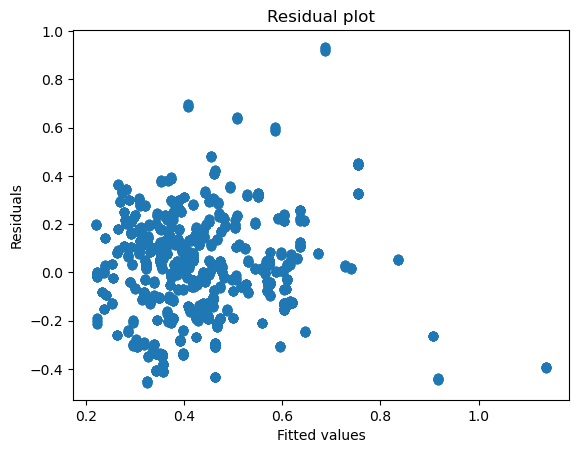

                    sum_sq      df           F         PR(>F)
Intercept         3.830721     1.0   93.942897   5.786026e-22
NPOC_uM          33.767521     1.0  828.099581  4.524626e-165
FeT_uM            1.312729     1.0   32.192770   1.499176e-08
NPOC_uM:FeT_uM    0.368849     1.0    9.045486   2.650518e-03
Residual        156.543387  3839.0         NaN            NaN


In [13]:
#Benthic chamber
# Define the model formula
#formula = 'a350 ~ NPOC_uM*TN_uM*FeT_uM' #.264
#formula = 'a350 ~ NPOC_uM*FeT_uM*TN_uM' #.264
#formula = 'a350 ~ NPOC_uM*TN_uM' #.239
#formula = 'a350 ~ NPOC_uM*Fe2_uM' #.228
#formula = 'a350 ~ NPOC_uM*Fe3_uM' #.259
formula = 'a350 ~ NPOC_uM*FeT_uM' #.262

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_bc).fit()

# Print the model summary
print(model.summary())

# Plot the residuals against the fitted values
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

# Perform ANOVA
anova_results = anova_lm(model, typ=3)
print(anova_results)


                            OLS Regression Results                            
Dep. Variable:                   a350   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     975.9
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:16:00   Log-Likelihood:                -32213.
No. Observations:                6752   AIC:                         6.444e+04
Df Residuals:                    6744   BIC:                         6.450e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               20.5273 

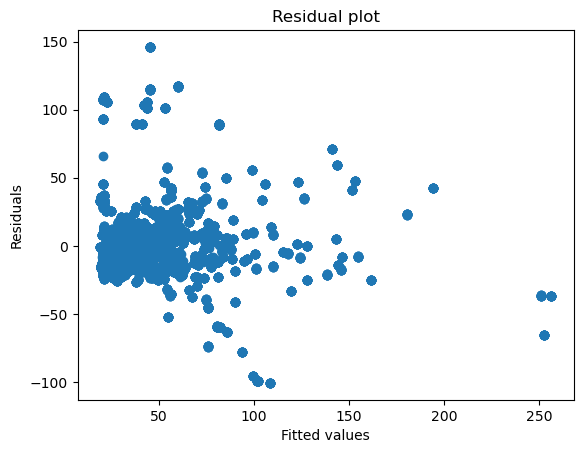

                            sum_sq      df           F         PR(>F)
Intercept             1.126342e+05     1.0  137.945051   1.517835e-31
Fe3_uM                2.090891e+04     1.0   25.607495   4.294812e-07
TN_uM                 5.604454e+03     1.0    6.863871   8.815288e-03
Fe3_uM:TN_uM          3.839981e+05     1.0  470.289049  7.258820e-101
NPOC_uM               1.020323e+03     1.0    1.249607   2.636674e-01
Fe3_uM:NPOC_uM        1.134674e+04     1.0   13.896544   1.947349e-04
TN_uM:NPOC_uM         4.320559e+03     1.0    5.291463   2.146059e-02
Fe3_uM:TN_uM:NPOC_uM  6.948554e+04     1.0   85.100132   3.724627e-20
Residual              5.506578e+06  6744.0         NaN            NaN


In [14]:
#Pore Water
# Define the model formula
formula = 'a350 ~ Fe3_uM+NPOC_uM' #.419 
formula = 'a350 ~ Fe3_uM' #.338 
formula = 'a350 ~ Fe3_uM+TN_uM' #.428 
formula = 'a350 ~ Fe3_uM*NPOC_uM' #.420 
formula = 'a350 ~ Fe3_uM*TN_uM' #.489 
formula = 'a350 ~ Fe3_uM+TN_uM*NPOC_uM' #.444
formula = 'a350 ~ Fe3_uM*TN_uM+NPOC_uM' #.490
formula = 'a350 ~ Fe3_uM*NPOC_uM+TN_uM' #.432
formula = 'a350 ~ Fe3_uM*TN_uM*NPOC_uM' #.503

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_pw).fit()

# Print the model summary
print(model.summary())

# Plot the residuals against the fitted values
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

# Perform ANOVA
anova_results = anova_lm(model, typ=3)
print(anova_results)


In [15]:
#Part 3 Calulate fluxes 

In [16]:
df_hights = pd.read_csv('../Dissertation_projects/Data/Hights.csv', sep=',')

df_hights['code'] = df_hights['Stn'] + '_' + df_hights['Camp']
#df_hights.drop("Stn", axis=1, inplace=True)
#df_hights.drop("Camp", axis=1, inplace=True)
df_hights.index = df_hights['code']
df_hights.drop("code", axis=1, inplace=True)

In [17]:
df_por = pd.read_csv('../Dissertation_projects/Data/Porosity/Porosity.csv', sep=',', index_col = 0)
df_por['code'] = df_por['Stn'] + '_' + df_por['camp']
df_por

,porosity,depth,camp,Stn,code
0,0.896846,0.25,GOM2021,St.11,St.11_GOM2021
1,0.898594,0.75,GOM2021,St.11,St.11_GOM2021
2,0.887348,1.25,GOM2021,St.11,St.11_GOM2021
3,0.879845,1.75,GOM2021,St.11,St.11_GOM2021
4,0.869916,2.50,GOM2021,St.11,St.11_GOM2021
...,...,...,...,...,...
1061,0.660463,17.00,GOM22SU,St.MK,St.MK_GOM22SU
1062,0.696337,19.00,GOM22SU,St.MK,St.MK_GOM22SU
1063,0.704780,22.50,GOM22SU,St.MK,St.MK_GOM22SU
1064,0.600938,27.50,GOM22SU,St.MK,St.MK_GOM22SU


In [18]:
# Assuming you already have df_por defined

df_p = df_por.loc[df_por['depth'] < 3]

# Compute aggregated statistics including count for porosity to calculate SE later
df_p = df_p.groupby('code').agg({
    'porosity': ['mean', 'std', 'count'],
    'Stn': 'first',
    'camp': 'first'
}).reset_index()

# Compute Standard Error for porosity
df_p['por_SE'] = df_p['porosity']['std'] / df_p['porosity']['count'].pow(0.5)

# Rename columns for clarity and set the index
df_p.columns = ['code', 'por_mean', 'por_sd', 'por_count', 'Stn', 'camp', 'por_SE']
df_p = df_p.set_index('code')

df_p

,por_mean,por_sd,por_count,Stn,camp,por_SE
code,,,,,,
St.11_GOM2021,0.886510,0.011972,5,St.11,GOM2021,0.005354
St.11_GOM21FA,0.901163,0.014873,6,St.11,GOM21FA,0.006072
St.11_GOM22SU,0.903834,0.010203,6,St.11,GOM22SU,0.004165
St.12_GOM21FA,0.822524,0.021835,6,St.12,GOM21FA,0.008914
St.12_GOM22SU,0.821506,0.039053,6,St.12,GOM22SU,0.015943
St.13_GOM21FA,0.904496,0.006950,6,St.13,GOM21FA,0.002838
St.13_GOM22SU,0.872732,0.023774,3,St.13,GOM22SU,0.013726
St.14_GOM2021,0.844243,0.023660,5,St.14,GOM2021,0.010581
St.14_GOM21FA,0.826907,0.033050,6,St.14,GOM21FA,0.013492


In [19]:
#make location data 
df_lat_lon = df_meta.groupby('code').agg({'Lat': 'mean', 'Lon': 'mean'}).reset_index().set_index('code')
df_lat_lon

,Lat,Lon
code,,
St.11_GOM2021,28.225724,-89.540904
St.11_GOM21FA,28.209529,-89.591672
St.11_GOM22SU,28.202880,-89.581503
St.12_GOM21FA,28.594249,-88.903741
St.12_GOM22SU,28.593063,-88.878258
St.13_GOM2021,28.536039,-89.492085
St.13_GOM21FA,28.524193,-89.610854
St.13_GOM22SP,28.507026,-89.622720
St.13_GOM22SU,28.524547,-89.597871


In [20]:
# slopes Calculate 
Frames = []

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_doc_bc.groupby('code')):
    # Extract x, y, and c data from the group
    
    x = group.loc[group['Time'] < 6, 'Time'].ravel()
    y = group.loc[group['Time'] < 6, 'NPOC_uM'].ravel()   
    
    # Calculate the slope of the regression line
    if len(x) > 1:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
        # Add the slope value to the plot
        slope = slope
        rsquared = r_value**2
        std_err = std_err
    
        dic = {'code':[code],
               'slope_doc':[slope],
               'rsquared_doc':[rsquared], 
               'std_err_doc':[std_err]}
    
        slopes = pd.DataFrame(dic)
        slopes = slopes.set_index('code', drop=True)
    
        Frames.append(slopes)

slopes_doc = pd.concat(Frames, axis=0, ignore_index=False)

In [21]:
# slopes Calculate 
Frames = []

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_doc_bc.groupby('code')):
    # Extract x, y, and c data from the group
    
    x = group.loc[group['Time'] < 6, 'Time'].ravel()
    y = group.loc[group['Time'] < 6, 'TN_uM'].ravel()   
    
    # Calculate the slope of the regression line
    if len(x) > 1:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
        # Add the slope value to the plot
        slope = slope
        rsquared = r_value**2
        std_err = std_err
    
        dic = {'code':[code],
               'slope_tn':[slope],
               'rsquared_tn':[rsquared], 
               'std_err_tn':[std_err]}
    
        slopes = pd.DataFrame(dic)
        slopes = slopes.set_index('code', drop=True)
    
        Frames.append(slopes)

slopes_tn = pd.concat(Frames, axis=0, ignore_index=False)

In [22]:
# slopes Calculate 
Frames = []

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_iron_bc.groupby('code')):
    # Extract x, y, and c data from the group
    
    x = group.loc[group['FeT_Time'] < 6, 'FeT_Time'].ravel()
    y = group.loc[group['FeT_Time'] < 6, 'Fe3_uM'].ravel()   
    
    # Calculate the slope of the regression line
    if len(x) > 1:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
        # Add the slope value to the plot
        slope = slope
        rsquared = r_value**2
        std_err = std_err
    
        dic = {'code':[code],
               'slope_fe3':[slope],
               'rsquared_fe3':[rsquared], 
               'std_err_fe3':[std_err]}
    
        slopes = pd.DataFrame(dic)
        slopes = slopes.set_index('code', drop=True)
    
        Frames.append(slopes)

slopes_fe3 = pd.concat(Frames, axis=0, ignore_index=False)
slopes_fe3 = slopes_fe3.dropna()

In [23]:
# slopes Calculate 
Frames = []

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_iron_bc.groupby('code')):
    # Extract x, y, and c data from the group
    
    x = group.loc[group['FeT_Time'] < 6, 'Fe2_Time'].ravel()
    y = group.loc[group['FeT_Time'] < 6, 'Fe2_uM'].ravel()   
    
    # Calculate the slope of the regression line
    if len(x) > 1:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
        # Add the slope value to the plot
        slope = slope
        rsquared = r_value**2
        std_err = std_err
    
        dic = {'code':[code],
               'slope_fe2':[slope],
               'rsquared_fe2':[rsquared], 
               'std_err_fe2':[std_err]}
    
        slopes = pd.DataFrame(dic)
        slopes = slopes.set_index('code', drop=True)
    
        Frames.append(slopes)

slopes_fe2 = pd.concat(Frames, axis=0, ignore_index=False)
slopes_fe2 = slopes_fe2.dropna()

In [24]:
# slopes Calculate 
Frames = []

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_cdom_bc.groupby('code')):
    # Extract x, y, and c data from the group
    
    x = group.loc[group['BC_time'] < 6, 'BC_time'].ravel()
    y = group.loc[group['BC_time'] < 6, 'acdom_350_bc'].ravel()   
    
    # Calculate the slope of the regression line
    if len(x) > 1:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
        # Add the slope value to the plot
        slope = slope
        rsquared = r_value**2
        std_err = std_err
    
        dic = {'code':[code],
               'slope_350':[slope],
               'rsquared_350':[rsquared], 
               'std_err_350':[std_err]}
    
        slopes = pd.DataFrame(dic)
        slopes = slopes.set_index('code', drop=True)
    
        Frames.append(slopes)

slopes_350 = pd.concat(Frames, axis=0, ignore_index=False)
slopes_350 = slopes_350.dropna()

In [25]:
# slopes Calculate 
Frames = []

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_cdom_bc.groupby('code')):
    # Extract x, y, and c data from the group
    
    x = group.loc[group['BC_time'] < 6, 'BC_time'].ravel()
    y = group.loc[group['BC_time'] < 6, 'acdom_412_bc'].ravel()   
    
    # Calculate the slope of the regression line
    if len(x) > 1:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
        # Add the slope value to the plot
        slope = slope
        rsquared = r_value**2
        std_err = std_err
    
        dic = {'code':[code],
               'slope_412':[slope],
               'rsquared_412':[rsquared], 
               'std_err_412':[std_err]}
    
        slopes = pd.DataFrame(dic)
        slopes = slopes.set_index('code', drop=True)
    
        Frames.append(slopes)

slopes_412 = pd.concat(Frames, axis=0, ignore_index=False)
slopes_412 = slopes_412.dropna()

In [26]:
#DOC slopes Calculate 
Frames = []

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_doc_pw.groupby('code')):
    # Extract x, y, and c data from the group
    
    x = group.loc[group['Depth'] < 3, 'Depth'].ravel() / 1000
    y = group.loc[group['Depth'] < 3, 'NPOC_uM'].ravel()
    
    # Calculate the slope of the regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Add the r-squared value to the plot
    rsquared = r_value**2
    
    # Add the slope value to the plot
    slope = slope
    
    dic = {'code':[code],
           'slope_doc_pw':[slope],
           'err_doc_pw':[std_err],
           'rsquared_doc_pw':[rsquared]}
    
    slopes = pd.DataFrame(dic)
    slopes = slopes.set_index('code', drop=True)
    
    Frames.append(slopes)

slopes_doc_pw = pd.concat(Frames, axis=0, ignore_index=False)
slopes_doc_pw = slopes_doc_pw.dropna()


In [27]:
#tn slopes Calculate 
Frames = []

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_doc_pw.groupby('code')):
    # Extract x, y, and c data from the group
    
    x = group.loc[group['Depth'] < 3, 'Depth'].ravel() / 1000
    y = group.loc[group['Depth'] < 3, 'TN_uM'].ravel()
    
    # Calculate the slope of the regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Add the r-squared value to the plot
    rsquared = r_value**2
    
    # Add the slope value to the plot
    slope = slope
    
    dic = {'code':[code],
           'slope_tn_pw':[slope],
           'err_tn_pw':[std_err],
           'rsquared_tn_pw':[rsquared]}
    
    slopes = pd.DataFrame(dic)
    slopes = slopes.set_index('code', drop=True)
    
    Frames.append(slopes)

slopes_tn_pw = pd.concat(Frames, axis=0, ignore_index=False)
slopes_tn_pw = slopes_tn_pw.dropna()

In [28]:
# fe Calculate 
Frames = []

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_iron_pw.groupby('code')):
    # Extract x, y, and c data from the group
    
    condition = group['FeT_Depth'] < 3
    if not group.loc[condition, 'Fe3_uM'].isna().any():
        x = group.loc[group['FeT_Depth'] < 3, 'FeT_Depth'].ravel() / 1000
        y = group.loc[group['FeT_Depth'] < 3, 'Fe3_uM'].ravel()
    
        # Calculate the slope of the regression line
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

        # Add the r-squared value to the plot
        rsquared = r_value**2
    
        # Add the slope value to the plot
        slope = slope
    
        dic = {'code':[code],
               'slope_fe3_pw':[slope],
               'err_fe3_pw':[std_err],
               'rsquared_fe3_pw':[rsquared]}
    
        slopes = pd.DataFrame(dic)
        slopes = slopes.set_index('code', drop=True)
    
        Frames.append(slopes)

slopes_fe3_pw = pd.concat(Frames, axis=0, ignore_index=False)
slopes_fe3_pw = slopes_fe3_pw.dropna()

In [29]:
# fe Calculate 
Frames = []

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_iron_pw.groupby('code')):
    # Extract x, y, and c data from the group
    
    condition = group['Fe2_Depth'] < 3
    if not group.loc[condition, 'Fe2_uM'].isna().any():
        x = group.loc[group['Fe2_Depth'] < 3, 'Fe2_Depth'].ravel() / 1000
        y = group.loc[group['Fe2_Depth'] < 3, 'Fe2_uM'].ravel()
    
        # Calculate the slope of the regression line
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

        # Add the r-squared value to the plot
        rsquared = r_value**2
    
        # Add the slope value to the plot
        slope = slope
    
        dic = {'code':[code],
               'slope_fe2_pw':[slope],
               'err_fe2_pw':[std_err],
               'rsquared_fe2_pw':[rsquared]}
    
        slopes = pd.DataFrame(dic)
        slopes = slopes.set_index('code', drop=True)
    
        Frames.append(slopes)

slopes_fe2_pw = pd.concat(Frames, axis=0, ignore_index=False)
slopes_fe2_pw = slopes_fe2_pw.dropna()

In [30]:
#CDOM slopes Calculate 
Frames = []

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_cdom_pw.groupby('code')):
    # Extract x, y, and c data from the group
    
    group['Sample_depth'] = group['Sample_depth'].astype(float)
    x = group.loc[group['Sample_depth'].astype(float) < 3, 'Sample_depth'].ravel() / 1000
    y = group.loc[group['Sample_depth'] < 3, 'acdom_412_bc'].ravel()
    
    # Calculate the slope of the regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Add the r-squared value to the plot
    rsquared = r_value**2
    
    # Add the slope value to the plot
    slope = slope
    
    dic = {'code':[code],
           'slope_a412_pw':[slope],
           'err_412_pw':[std_err],
           'rsquared_a412_pw':[rsquared]}
    
    slopes = pd.DataFrame(dic)
    slopes = slopes.set_index('code', drop=True)
    
    Frames.append(slopes)

slopes_412_pw = pd.concat(Frames, axis=0, ignore_index=False)
slopes_412_pw = slopes_412_pw.dropna()

In [31]:
#CDOM slopes Calculate 
Frames = []

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_cdom_pw.groupby('code')):
    # Extract x, y, and c data from the group
    
    group['Sample_depth'] = group['Sample_depth'].astype(float)
    x = group.loc[group['Sample_depth'].astype(float) < 3, 'Sample_depth'].ravel() / 1000
    y = group.loc[group['Sample_depth'] < 3, 'acdom_350_bc'].ravel()
    
    # Calculate the slope of the regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Add the r-squared value to the plot
    rsquared = r_value**2
    
    # Add the slope value to the plot
    slope = slope
    
    dic = {'code':[code],
           'slope_a350_pw':[slope],
           'err_350_pw':[std_err],
           'rsquared_a350_pw':[rsquared]}
    
    slopes = pd.DataFrame(dic)
    slopes = slopes.set_index('code', drop=True)
    
    Frames.append(slopes)

slopes_350_pw = pd.concat(Frames, axis=0, ignore_index=False)
slopes_350_pw = slopes_350_pw.dropna()

In [32]:
#concat it all 
df_flux = pd.concat([df_hights, df_p, df_lat_lon, 
                     slopes_350, slopes_412, slopes_doc, slopes_tn, slopes_fe2, slopes_fe3,
                     slopes_350_pw, slopes_412_pw, slopes_doc_pw, slopes_tn_pw, slopes_fe2_pw,
                     slopes_fe3_pw], axis=1, join='outer')
df_flux

,Camp,Stn,Hight_m,Hight_error,por_mean,por_sd,por_count,Stn,camp,por_SE,...,rsquared_doc_pw,slope_tn_pw,err_tn_pw,rsquared_tn_pw,slope_fe2_pw,err_fe2_pw,rsquared_fe2_pw,slope_fe3_pw,err_fe3_pw,rsquared_fe3_pw
code,,,,,,,,,,,,,,,,,,,,,
St.4_GOM22SU,GOM22SU,St.4,0.042412,0.016330,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001457,21464.831051,5203.543074,0.772892,25510.289009,13951.258963,0.400733,17633.797609,6835.430802,0.571006
St.5B_GOM22SU,GOM22SU,St.5B,0.045239,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.771031,77763.724545,10865.170746,0.911071,31273.171730,13588.291829,0.514413,35073.549027,18457.023853,0.419352
St.7_GOM22SU,GOM22SU,St.7,0.040527,0.036591,0.866250,0.023150,6.0,St.7,GOM22SU,0.009451,...,0.752382,41696.624299,5921.002808,0.925362,19413.540502,4699.473154,0.810113,NaN,NaN,NaN
St.9_GOM22SU,GOM22SU,St.9,0.030536,0.013019,0.863517,0.014980,6.0,St.9,GOM22SU,0.006116,...,NaN,NaN,NaN,NaN,2871.659490,973.141814,0.635247,NaN,NaN,NaN
St.14_GOM22SU,GOM22SU,St.14,0.032987,0.013019,0.861703,0.027134,6.0,St.14,GOM22SU,0.011077,...,0.071397,8848.301626,910.790717,0.969193,2053.692729,883.700373,0.642893,10922.931885,4605.215656,0.652203
St.15_GOM22SU,GOM22SU,St.15,0.034118,0.014974,0.909457,0.019171,6.0,St.15,GOM22SU,0.007826,...,0.600577,12730.872452,6083.581919,0.593453,1764.136919,480.923281,0.817695,13280.385024,5927.810866,0.625897
St.13_GOM22SU,GOM22SU,St.13,0.030159,0.016499,0.872732,0.023774,3.0,St.13,GOM22SU,0.013726,...,0.551010,10975.330299,9453.098164,0.310026,-73.697060,291.000699,0.020932,0.000000,0.000000,0.000000
St.2_GOM22SU,GOM22SU,St.2,0.027921,0.030491,0.870513,0.013238,6.0,St.2,GOM22SU,0.005405,...,0.296538,71980.681902,14490.145823,0.891605,4622.364095,1131.004682,0.847740,85123.929689,19439.836227,0.864708
St.16_GOM22SU,GOM22SU,St.16,0.028746,0.030912,0.853827,0.020856,6.0,St.16,GOM22SU,0.008514,...,NaN,NaN,NaN,NaN,8342.737601,1480.629895,0.913666,33164.475083,22751.587798,0.414614


In [33]:
#FLUX CALCULATONS 

df_flux["bc_flux_aCDOM350"] = df_flux["slope_350"] * (df_flux["Hight_m"]*(np.pi*((30/100)**2))) / (np.pi*((30/100)**2)) * 24 
df_flux["bc_flux_aCDOM412"] = df_flux["slope_412"] * (df_flux["Hight_m"]*(np.pi*((30/100)**2))) / (np.pi*((30/100)**2)) * 24 
df_flux["bc_flux_doc"] = df_flux["slope_doc"] * (((df_flux["Hight_m"]*(np.pi*((30/100)**2)))*1000) / (np.pi*((30/100)**2))) * 24 /1000
df_flux["bc_flux_tn"] = df_flux["slope_tn"] * (((df_flux["Hight_m"]*(np.pi*((30/100)**2)))*1000) / (np.pi*((30/100)**2))) * 24 /1000
df_flux["bc_flux_fe3"] = df_flux["slope_fe3"] * (((df_flux["Hight_m"]*(np.pi*((30/100)**2)))*1000) / (np.pi*((30/100)**2))) * 24 /1000
df_flux["bc_flux_fe2"] = df_flux["slope_fe3"] * (((df_flux["Hight_m"]*(np.pi*((30/100)**2)))*1000) / (np.pi*((30/100)**2))) * 24 /1000

H = 3
A = np.pi*(4.2388**2) 
D_doc = 0.000001728 
D_fe = 1000
D_tn = 1000

#calcute flux 
df_flux["pw_flux_aCDOM412"] = df_flux["slope_412_pw"]*x_equal * (H * A * df_flux["por_mean"] / 1000) * D_doc 
df_flux["pw_flux_aCDOM350"] = df_flux["slope_350_pw"]*x_equal * (H * A * df_flux["por_mean"] / 1000) * D_doc  
df_flux["pw_flux_doc"] = df_flux["slope_doc_pw"] * (H * A * df_flux["por_mean"] / 1000) * D_doc * 1000
df_flux["pw_flux_tn"] = df_flux["slope_tn_pw"] * (H * A * df_flux["por_mean"] / 1000) * D_tn * 1000
df_flux["pw_flux_fe3"] = df_flux["slope_fe3_pw"] * (H * A * df_flux["por_mean"] / 1000) * D_fe * 1000
df_flux["pw_flux_fe2"] = df_flux["slope_fe2_pw"] * (H * A * df_flux["por_mean"] / 1000) * D_fe * 1000

df_flux

KeyError: 'slope_412_pw'

In [ ]:
stop

In [ ]:
#DOC slopes 
df_doc_bc_plot = df_bc[(df_bc['NPOC_uM'] != 0)]
df_doc_bc_plot = df_doc_bc_plot.dropna(subset=["NPOC_uM"])
df_doc_bc_plot = df_doc_bc_plot.dropna(subset=["Time"])
codes = df_doc_bc_plot['code'].unique()
df_doc_bc_plot = df_doc_bc_plot[df_doc_bc_plot['code'] != 'St.MK_GOM22SU']

#make plot
fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(14, 20)) 

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_doc_bc_plot.groupby('code')):
    # Extract x, y, and c data from the group
    
    x = group['Time']
    y = group['NPOC_uM']
    
    xx4 = group.loc[group['Time'] < 4, 'Time'].unique().ravel()
    yy4 = group.loc[group['Time'] < 4, 'NPOC_uM'].unique().ravel()
    
    xx6 = group.loc[group['Time'] < 6, 'Time'].unique().ravel()
    yy6 = group.loc[group['Time'] < 6, 'NPOC_uM'].unique().ravel()
    
    xx8 = group.loc[group['Time'] < 8, 'Time'].unique().ravel()
    yy8 = group.loc[group['Time'] < 8, 'NPOC_uM'].unique().ravel()
    
    xx10 = group.loc[group['Time'] < 10, 'Time'].unique().ravel()
    yy10 = group.loc[group['Time'] < 10, 'NPOC_uM'].unique().ravel()
    
    # Plot the data for this subgroup on its corresponding subplot
    ax = axs[i // 3, i % 3]
    sc = ax.scatter(x, y, c="black")
    
    # Add subplot labels
    ax.set_title(code)
    ax.set_xlabel('Time in Hours')
    ax.set_ylabel('DOC uM')
    ax.set_xlim(0,df_doc_bc['Time'].max())
    ax.set_ylim(df_doc_bc['NPOC_uM'].min(),df_doc_bc['NPOC_uM'].max())
    
    # Calculate the slope of the regression line
    slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(xx4, yy4)
    slope6, intercept6, r_value6, p_value6, std_err6 = stats.linregress(xx6, yy6)
    slope8, intercept8, r_value8, p_value8, std_err6 = stats.linregress(xx8, yy8)
    slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(xx10, yy10)

    # Add the regression line to the plot
    ax.plot(x, intercept4 + slope4 * x, c='r')
    ax.plot(x, intercept6 + slope6 * x, c='g')
    ax.plot(x, intercept8 + slope8 * x, c='b')
    ax.plot(x, intercept1 + slope1 * x, c='y')

    
    # Add the equation of the regression line to the plot
    #equation = f'y = {slope:.2f}x + {intercept:.2f}'
    #ax.text(1, 390, equation)
    
    # Add the r-squared value to the plot
    rsquared4 = f'R² = {r_value4**2:.2f}'
    rsquared6 = f'R² = {r_value6**2:.2f}'
    rsquared8 = f'R² = {r_value8**2:.2f}'
    rsquared1 = f'R² = {r_value1**2:.2f}'

    ax.text(1, 400, rsquared4, c='r')
    ax.text(1, 300, rsquared6, c='g')
    ax.text(1, 200, rsquared8, c='b')
    ax.text(1, 100, rsquared1, c='y')
    
    # Add the slope value to the plot
    #sloped = f'Slope = {slope:.3f}'
    #ax.text(1, 270, sloped, fontweight='bold')

# Add overall figure labels and color bar
fig.suptitle(r'DOC Slopes and intercepts' '\n')
plt.tight_layout()
fig.set_facecolor('w')

plt.savefig("../Dissertation_projects/Figures/Flux_figures/DOC_flux.png")

plt.show()

In [ ]:
#Nitrogen slopes
fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(16, 20)) 

df_tn_bc_plot = df_bc[(df_bc['TN_uM'] != 0)]
df_tn_bc_plot = df_tn_bc_plot.dropna(subset=["TN_uM"])
codes = df_tn_bc_plot['code'].unique()
df_tn_bc_plot = df_tn_bc_plot[df_tn_bc_plot['code'] != 'St.13_GOM22SP']

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_tn_bc_plot.groupby('code')):
    # Extract x, y, and c data from the group
    
    x = group['Time']
    y = group['TN_uM']
    
    xx4 = group.loc[group['Time'] < 4, 'Time'].ravel()
    yy4 = group.loc[group['Time'] < 4, 'TN_uM'].ravel()
    
    xx6 = group.loc[group['Time'] < 6, 'Time'].ravel()
    yy6 = group.loc[group['Time'] < 6, 'TN_uM'].ravel()
    
    xx8 = group.loc[group['Time'] < 8, 'Time'].ravel()
    yy8 = group.loc[group['Time'] < 8, 'TN_uM'].ravel()
    
    xx10 = group.loc[group['Time'] < 10, 'Time'].ravel()
    yy10 = group.loc[group['Time'] < 10, 'TN_uM'].ravel()
    
    # Plot the data for this subgroup on its corresponding subplot
    ax = axs[i // 3, i % 3]
    sc = ax.scatter(x, y, c='green')
    
    # Add subplot labels
    ax.set_title(code)
    ax.set_xlabel('Time')
    ax.set_ylabel('TN uM')
    ax.set_xlim(0,df_doc_bc['Time'].max())
    ax.set_ylim(df_doc_bc['TN_uM'].min(),df_doc_bc['TN_uM'].max())
    
    # Calculate the slope of the regression line
    slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(xx4, yy4)
    slope6, intercept6, r_value6, p_value6, std_err6 = stats.linregress(xx6, yy6)
    slope8, intercept8, r_value8, p_value8, std_err6 = stats.linregress(xx8, yy8)
    slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(xx10, yy10)

    # Add the regression line to the plot
    ax.plot(x, intercept4 + slope4 * x, c='r')
    ax.plot(x, intercept6 + slope6 * x, c='g')
    ax.plot(x, intercept8 + slope8 * x, c='b')
    ax.plot(x, intercept1 + slope1 * x, c='y')

    
    # Add the equation of the regression line to the plot
    #equation = f'y = {slope:.2f}x + {intercept:.2f}'
    #ax.text(1, 390, equation)
    
    # Add the r-squared value to the plot
    rsquared4 = f'R² = {r_value4**2:.2f}'
    rsquared6 = f'R² = {r_value6**2:.2f}'
    rsquared8 = f'R² = {r_value8**2:.2f}'
    rsquared1 = f'R² = {r_value1**2:.2f}'

    ax.text(1, 35, rsquared4, c='r')
    ax.text(1, 30, rsquared6, c='g')
    ax.text(1, 25, rsquared8, c='b')
    ax.text(1, 20, rsquared1, c='y')
    
    # Add the slope value to the plot
    #sloped = f'Slope = {slope:.3f}'
    #ax.text(1, 270, sloped, fontweight='bold')

# Add overall figure labels and color bar
fig.suptitle(r'TN Slopes and intercepts:'+' \n')
plt.tight_layout()
fig.set_facecolor('w')

plt.savefig("../Dissertation_projects/Figures/Flux_figures/TN_flux.png")

plt.show()

In [ ]:
#Fe 2 slopes
fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(16, 20)) 

df_tn_bc_plot = df_doc_bc[(df_doc_bc['Fe2_2'] != 0)]
df_tn_bc_plot = df_tn_bc_plot.dropna(subset=["TN_uM"])
codes = df_tn_bc_plot['code'].unique()
df_tn_bc_plot = df_tn_bc_plot[df_tn_bc_plot['code'] != 'St.13_GOM22SP']

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_tn_bc_plot.groupby('code')):
    # Extract x, y, and c data from the group
    
    x = group['Time']
    y = group['TN_uM']
    
    xx4 = group.loc[group['Time'] < 4, 'Time'].ravel()
    yy4 = group.loc[group['Time'] < 4, 'TN_uM'].ravel()
    
    xx6 = group.loc[group['Time'] < 6, 'Time'].ravel()
    yy6 = group.loc[group['Time'] < 6, 'TN_uM'].ravel()
    
    xx8 = group.loc[group['Time'] < 8, 'Time'].ravel()
    yy8 = group.loc[group['Time'] < 8, 'TN_uM'].ravel()
    
    xx10 = group.loc[group['Time'] < 10, 'Time'].ravel()
    yy10 = group.loc[group['Time'] < 10, 'TN_uM'].ravel()
    
    # Plot the data for this subgroup on its corresponding subplot
    ax = axs[i // 3, i % 3]
    sc = ax.scatter(x, y, c='green')
    
    # Add subplot labels
    ax.set_title(code)
    ax.set_xlabel('Time')
    ax.set_ylabel('TN uM')
    ax.set_xlim(0,df_doc_bc['Time'].max())
    ax.set_ylim(df_doc_bc['TN_uM'].min(),df_doc_bc['TN_uM'].max())
    
    # Calculate the slope of the regression line
    slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(xx4, yy4)
    slope6, intercept6, r_value6, p_value6, std_err6 = stats.linregress(xx6, yy6)
    slope8, intercept8, r_value8, p_value8, std_err6 = stats.linregress(xx8, yy8)
    slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(xx10, yy10)

    # Add the regression line to the plot
    ax.plot(x, intercept4 + slope4 * x, c='r')
    ax.plot(x, intercept6 + slope6 * x, c='g')
    ax.plot(x, intercept8 + slope8 * x, c='b')
    ax.plot(x, intercept1 + slope1 * x, c='y')

    
    # Add the equation of the regression line to the plot
    #equation = f'y = {slope:.2f}x + {intercept:.2f}'
    #ax.text(1, 390, equation)
    
    # Add the r-squared value to the plot
    rsquared4 = f'R² = {r_value4**2:.2f}'
    rsquared6 = f'R² = {r_value6**2:.2f}'
    rsquared8 = f'R² = {r_value8**2:.2f}'
    rsquared1 = f'R² = {r_value1**2:.2f}'

    ax.text(1, 35, rsquared4, c='r')
    ax.text(1, 30, rsquared6, c='g')
    ax.text(1, 25, rsquared8, c='b')
    ax.text(1, 20, rsquared1, c='y')
    
    # Add the slope value to the plot
    #sloped = f'Slope = {slope:.3f}'
    #ax.text(1, 270, sloped, fontweight='bold')

# Add overall figure labels and color bar
fig.suptitle(r'TN Slopes and intercepts:'+' \n')
plt.tight_layout()
fig.set_facecolor('w')

plt.savefig("../Dissertation_projects/Figures/Flux_figures/TN_flux.png")

plt.show()

In [ ]:
#CDOM slopes
df_cdom_bc_plot = df_cdom_bc[df_cdom_bc['code'] != 'St.13_GOM22SP']
df_cdom_bc_plot = df_cdom_bc_plot[df_cdom_bc_plot['code'] != 'St.14_GOM2021']
df_cdom_bc_plot = df_cdom_bc_plot.dropna(subset=['acdom_350_bc'])
codes = df_cdom_bc_plot['code'].unique()

fig, axs = plt.subplots(nrows=13, ncols=3, figsize=(16, 25)) 

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_cdom_bc_plot.groupby('code')):
    # Extract x, y, and c data from the group
    
    x = group['BC_time']
    y = group['acdom_350_bc']
    
    xx4 = group.loc[group['BC_time'] < 4, 'BC_time'].ravel()
    yy4 = group.loc[group['BC_time'] < 4, 'acdom_350_bc'].ravel()
    
    xx6 = group.loc[group['BC_time'] < 6, 'BC_time'].ravel()
    yy6 = group.loc[group['BC_time'] < 6, 'acdom_350_bc'].ravel()
    
    xx8 = group.loc[group['BC_time'] < 8, 'BC_time'].ravel()
    yy8 = group.loc[group['BC_time'] < 8, 'acdom_350_bc'].ravel()
    
    xx10 = group.loc[group['BC_time'] < 10, 'BC_time'].ravel()
    yy10 = group.loc[group['BC_time'] < 10, 'acdom_350_bc'].ravel()
    
    # Plot the data for this subgroup on its corresponding subplot
    ax = axs[i // 3, i % 3]
    sc = ax.scatter(x, y, c='y')
    
    # Add subplot labels
    ax.set_title(code)
    ax.set_xlabel('Time')
    ax.set_ylabel('aCDOM 350')
    ax.set_xlim(0,df_doc_bc['Time'].max())
    ax.set_ylim(-1,2)
    
    # Calculate the slope of the regression line
    slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(xx4, yy4)
    slope6, intercept6, r_value6, p_value6, std_err6 = stats.linregress(xx6, yy6)
    slope8, intercept8, r_value8, p_value8, std_err6 = stats.linregress(xx8, yy8)
    slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(xx10, yy10)

    # Add the regression line to the plot
    ax.plot(x, intercept4 + slope4 * x, c='r')
    ax.plot(x, intercept6 + slope6 * x, c='g')
    ax.plot(x, intercept8 + slope8 * x, c='b')
    ax.plot(x, intercept1 + slope1 * x, c='y')
    
    # Add the equation of the regression line to the plot
    #equation = f'y = {slope:.2f}x + {intercept:.2f}'
    #ax.text(1, 390, equation)
    
    # Add the r-squared value to the plot
    rsquared4 = f'R² = {r_value4**2:.2f}'
    rsquared6 = f'R² = {r_value6**2:.2f}'
    rsquared8 = f'R² = {r_value8**2:.2f}'
    rsquared1 = f'R² = {r_value1**2:.2f}'

    ax.text(1, 2.2, rsquared4, c='r')
    ax.text(1, 1.8, rsquared6, c='g')
    ax.text(1, 1.4, rsquared8, c='b')
    ax.text(1, 1, rsquared1, c='y')

# Add overall figure labels and color bar
fig.suptitle(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 350 nm'+'\n')
plt.tight_layout()
fig.set_facecolor('w')

plt.savefig("../Dissertation_projects/Figures/Flux_figures/CDOM350_flux.png")

plt.show()

In [ ]:
#DOC slopes Calculate 
Frames = []

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_doc_bc_plot.groupby('code')):
    # Extract x, y, and c data from the group
    
    xx4 = group.loc[group['Time'] < 4, 'Time'].ravel()
    yy4 = group.loc[group['Time'] < 4, 'NPOC_uM'].ravel()
    
    xx6 = group.loc[group['Time'] < 6, 'Time'].ravel()
    yy6 = group.loc[group['Time'] < 6, 'NPOC_uM'].ravel()
    
    xx8 = group.loc[group['Time'] < 8, 'Time'].ravel()
    yy8 = group.loc[group['Time'] < 8, 'NPOC_uM'].ravel()
    
    xx10 = group.loc[group['Time'] < 10, 'Time'].ravel()
    yy10 = group.loc[group['Time'] < 10, 'NPOC_uM'].ravel()    
        
    # Calculate the slope of the regression line
    slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(xx4, yy4)
    slope6, intercept6, r_value6, p_value6, std_err6 = stats.linregress(xx6, yy6)
    slope8, intercept8, r_value8, p_value8, std_err8 = stats.linregress(xx8, yy8)
    slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(xx10, yy10)
    
    r_squared_values = {
        'r4': std_err4,
        'r6': std_err6,
        'r8': std_err8,
        'r10':std_err1}

    r_squared_values = {key: value for key, value in r_squared_values.items() if value != 0}
    max_key = min(r_squared_values, key=r_squared_values.get)

    if max_key == 'r4':
        best_slope = slope4
        best_r_squared = r_value4**2
        best_std_err = std_err4
        note_hours = "4 hours"
    elif max_key == 'r6':
        best_slope = slope6
        best_r_squared = r_value6**2
        best_std_err = std_err6
        note_hours = "6 hours"
    elif max_key == 'r8':
        best_slope = slope8
        best_r_squared = r_value8**2
        best_std_err = std_err8 
        note_hours = "8 hours"
    else:
        best_slope = slope1
        best_r_squared = r_value1**2
        best_std_err = std_err1
        note_hours = "10 hours"
    
    # Add the slope value to the plot
    slope = best_slope
    rsquared = best_r_squared
    std_err = best_std_err
    
    dic = {'code':[code],
           'slope_doc':[slope],
           'rsquared_doc':[rsquared], 
           'std_err_doc':[std_err],
           'note_doc': [note_hours]}
    
    slopes = pd.DataFrame(dic)
    slopes = slopes.set_index('code', drop=True)
    
    Frames.append(slopes)

slopes_doc = pd.concat(Frames, axis=0, ignore_index=False)
slopes_doc

In [ ]:
#TN slopes Calculate 
Frames = []

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_tn_bc_plot.groupby('code')):
    # Extract x, y, and c data from the group
    
    xx4 = group.loc[group['Time'] < 4, 'Time'].ravel()
    yy4 = group.loc[group['Time'] < 4, 'TN_uM'].ravel()
    
    xx6 = group.loc[group['Time'] < 6, 'Time'].ravel()
    yy6 = group.loc[group['Time'] < 6, 'TN_uM'].ravel()
    
    xx8 = group.loc[group['Time'] < 8, 'Time'].ravel()
    yy8 = group.loc[group['Time'] < 8, 'TN_uM'].ravel()
    
    xx10 = group.loc[group['Time'] < 10, 'Time'].ravel()
    yy10 = group.loc[group['Time'] < 10, 'TN_uM'].ravel()    
        
    # Calculate the slope of the regression line
    slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(xx4, yy4)
    slope6, intercept6, r_value6, p_value6, std_err6 = stats.linregress(xx6, yy6)
    slope8, intercept8, r_value8, p_value8, std_err8 = stats.linregress(xx8, yy8)
    slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(xx10, yy10)
    
    r_squared_values = {
        'r4': std_err4,
        'r6': std_err6,
        'r8': std_err8,
        'r10':std_err1}

    r_squared_values = {key: value for key, value in r_squared_values.items() if value != 0}
    max_key = min(r_squared_values, key=r_squared_values.get)

    if max_key == 'r4':
        best_slope = slope4
        best_r_squared = r_value4**2
        best_std_err = std_err4
        note_hours = "4 hours"
    elif max_key == 'r6':
        best_slope = slope6
        best_r_squared = r_value6**2
        best_std_err = std_err6
        note_hours = "6 hours"
    elif max_key == 'r8':
        best_slope = slope8
        best_r_squared = r_value8**2
        best_std_err = std_err8 
        note_hours = "8 hours"
    else:
        best_slope = slope1
        best_r_squared = r_value1**2
        best_std_err = std_err1
        note_hours = "10 hours"
    
    # Add the slope value to the plot
    slope = best_slope
    rsquared = best_r_squared
    std_err = best_std_err
    
    dic = {'code':[code],
           'slope_tn':[slope],
           'rsquared_tn':[rsquared], 
           'std_err_tn':[std_err],
           'note_tn': [note_hours]}
    
    slopes = pd.DataFrame(dic)
    slopes = slopes.set_index('code', drop=True)
    
    Frames.append(slopes)

slopes_tn = pd.concat(Frames, axis=0, ignore_index=False)
slopes_tn

In [ ]:
#cdom slopes Calculate 
Frames = []

# Group the data by 'code' and iterate over each subgroup
for i, (code, group) in enumerate(df_cdom_bc_plot.groupby('code')):
    # Extract x, y, and c data from the group
    
    xx4 = group.loc[group['BC_time'] < 4, 'BC_time'].ravel()
    yy4 = group.loc[group['BC_time'] < 4, 'acdom_350_bc']*x_equal.ravel()
    
    xx6 = group.loc[group['BC_time'] < 6, 'BC_time'].ravel()
    yy6 = group.loc[group['BC_time'] < 6, 'acdom_350_bc']*x_equal.ravel()
    
    xx8 = group.loc[group['BC_time'] < 8, 'BC_time'].ravel()
    yy8 = group.loc[group['BC_time'] < 8, 'acdom_350_bc']*x_equal.ravel()
    
    xx10 = group.loc[group['BC_time'] < 10, 'BC_time'].ravel()
    yy10 = group.loc[group['BC_time'] < 10, 'acdom_350_bc']*x_equal.ravel()    
        
    # Calculate the slope of the regression line
    slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(xx4, yy4)
    slope6, intercept6, r_value6, p_value6, std_err6 = stats.linregress(xx6, yy6)
    slope8, intercept8, r_value8, p_value8, std_err8 = stats.linregress(xx8, yy8)
    slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(xx10, yy10)
    
    r_squared_values = {
        'r4': std_err4,
        'r6': std_err6,
        'r8': std_err8,
        'r10':std_err1}

    r_squared_values = {key: value for key, value in r_squared_values.items() if value != 0}
    max_key = min(r_squared_values, key=r_squared_values.get)

    if max_key == 'r4':
        best_slope = slope4
        best_r_squared = r_value4**2
        best_std_err = std_err4
        note_hours = "4 hours"
    elif max_key == 'r6':
        best_slope = slope6
        best_r_squared = r_value6**2
        best_std_err = std_err6
        note_hours = "6 hours"
    elif max_key == 'r8':
        best_slope = slope8
        best_r_squared = r_value8**2
        best_std_err = std_err8 
        note_hours = "8 hours"
    else:
        best_slope = slope1
        best_r_squared = r_value1**2
        best_std_err = std_err1
        note_hours = "10 hours"
    
    # Add the slope value to the plot
    slope = best_slope
    rsquared = best_r_squared
    std_err = best_std_err
    
    dic = {'code':[code],
           'slope_a350':[slope],
           'rsquared_a350':[rsquared], 
           'std_err_a350':[std_err],
           'note_a350': [note_hours]}
    
    slopes = pd.DataFrame(dic)
    slopes = slopes.set_index('code', drop=True)
    
    Frames.append(slopes)

slopes_a350 = pd.concat(Frames, axis=0, ignore_index=False)
slopes_a350